In [61]:
import pandas as pd

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
import seaborn as sns


In [64]:
df=pd.read_csv('EVdata.csv')

In [65]:
df.shape

(96845, 8)

In [66]:
df.columns.nunique()

8

In [67]:
df.columns

Index(['Year', 'Month_Name', 'Date', 'State', 'Vehicle_Class',
       'Vehicle_Category', 'Vehicle_Type', 'EV_Sales_Quantity'],
      dtype='object')

In [68]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [69]:
df.tail()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
96840,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CAR,4-Wheelers,4W_Personal,1.0
96841,2023.0,dec,12/1/2023,Andaman & Nicobar Island,MOTOR CYCLE/SCOOTER-USED FOR HIRE,2-Wheelers,2W_Shared,5.0
96842,2023.0,dec,12/1/2023,Andaman & Nicobar Island,OMNI BUS,Bus,Bus,0.0
96843,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0.0
96844,2023.0,dec,12/1/2023,Andaman & Nicobar Island,THREE WHEELER (PASSENGER),3-Wheelers,3W_Shared,0.0


In [70]:
df.Year.value_counts()

Year
2019.0    10315
2023.0    10279
2018.0    10225
2022.0    10021
2017.0     9799
2016.0     9348
2021.0     9249
2015.0     9052
2014.0     9022
2020.0     8675
2024.0      860
Name: count, dtype: int64

In [71]:
df.State.value_counts()

State
Maharashtra                 4912
Karnataka                   4830
Uttar Pradesh               4557
Rajasthan                   4552
Gujarat                     4517
West Bengal                 4196
Tamil Nadu                  4063
Odisha                      4027
Haryana                     3842
Kerala                      3666
Chhattisgarh                3590
Madhya Pradesh              3587
Andhra Pradesh              3457
Assam                       3114
Uttarakhand                 3045
Himachal Pradesh            2980
Punjab                      2950
Jharkhand                   2773
Bihar                       2544
Jammu and Kashmir           2292
Arunachal Pradesh           2285
Goa                         2139
DNH and DD                  1927
Delhi                       1871
Meghalaya                   1867
Puducherry                  1832
Manipur                     1632
Nagaland                    1588
Tripura                     1564
Mizoram                     1557
Chan

In [72]:
df.Vehicle_Class.value_counts()

Vehicle_Class
MOTOR CAR                           4111
M-CYCLE/SCOOTER                     4101
GOODS CARRIER                       4096
MOTOR CAB                           3985
BUS                                 3813
                                    ... 
SEMI-TRAILER (COMMERCIAL)             18
X-RAY VAN                             12
MOTOR CYCLE/SCOOTER-WITH TRAILER       9
MODULAR HYDRAULIC TRAILER              3
MOTOR CARAVAN                          3
Name: count, Length: 73, dtype: int64

In [73]:
df.Vehicle_Category.value_counts()

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64

In [74]:
df.Vehicle_Type.value_counts()

Vehicle_Type
Others                54423
2W_Personal           11700
Bus                    7026
4W_Shared              4580
4W_Personal            4111
3W_Shared              3786
3W_Goods               3208
Institution Bus        2093
3W_Shared_LowSpeed     1951
3W_Goods_LowSpeed      1517
2W_Shared              1421
3W_Personal            1029
Name: count, dtype: int64

In [75]:
df.drop(columns=['Year']).describe()

,EV_Sales_Quantity
count,96845.000000
mean,37.108896
std,431.566675
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,20584.000000


In [76]:
check_duplicates=df.duplicated().sum()
print(check_duplicates)

0


In [77]:
check_missing_values=df.isnull().sum()
print(check_missing_values)

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [79]:
df['Year'] = df['Year'].astype(int)

In [80]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [81]:
categorical_columns = ['Month_Name','State','Vehicle_Class','Vehicle_Category','Vehicle_Type']
df[categorical_columns]= df[categorical_columns].astype('category')


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Year               96845 non-null  int64         
 1   Month_Name         96845 non-null  category      
 2   Date               96845 non-null  datetime64[ns]
 3   State              96845 non-null  category      
 4   Vehicle_Class      96845 non-null  category      
 5   Vehicle_Category   96845 non-null  category      
 6   Vehicle_Type       96845 non-null  category      
 7   EV_Sales_Quantity  96845 non-null  float64       
dtypes: category(5), datetime64[ns](1), float64(1), int64(1)
memory usage: 2.7 MB


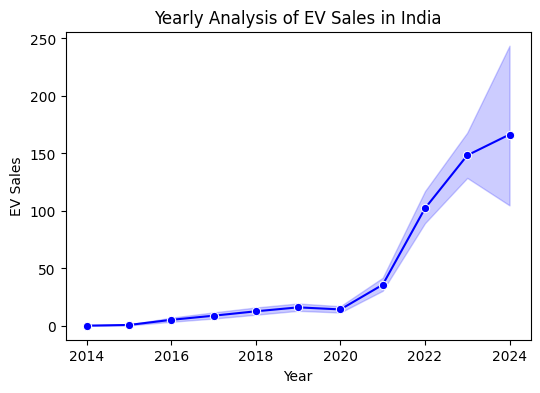

In [83]:
plt.figure(figsize=(6,4))
plt.title('Yearly Analysis of EV Sales in India')
sns.lineplot(x='Year', y='EV_Sales_Quantity', data=df,marker='o',color='b')
plt.xlabel('Year')
plt.ylabel('EV Sales');

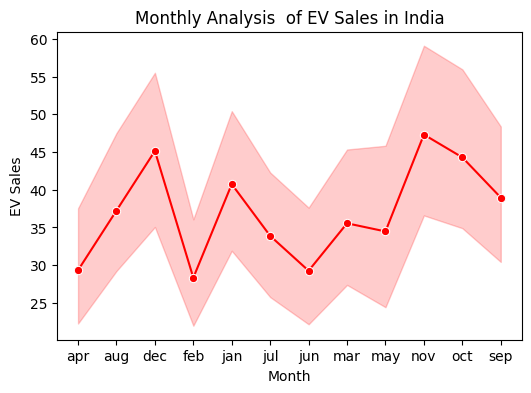

In [84]:
plt.figure(figsize=(6,4))
plt.title('Monthly Analysis  of EV Sales in India')
sns.lineplot(x='Month_Name', y='EV_Sales_Quantity', data=df, marker='o', color='r')
plt.xlabel('Month')
plt.ylabel('EV Sales');

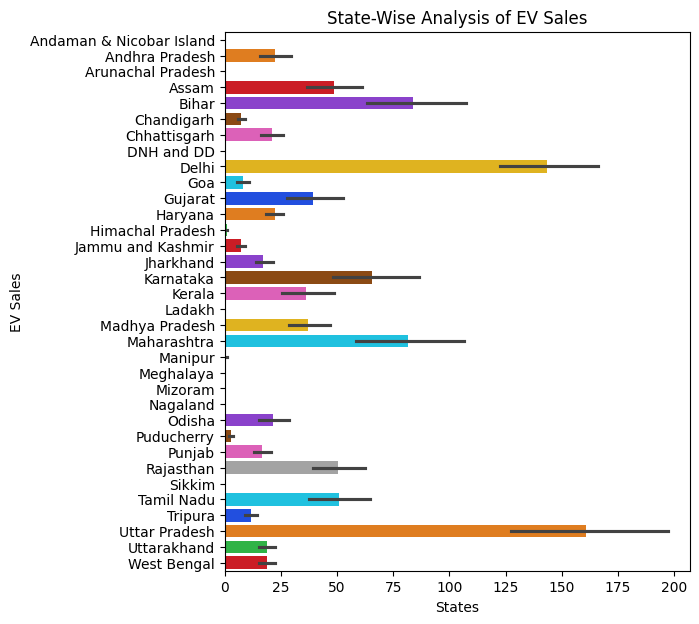

In [85]:
plt.figure(figsize=(6,7))
plt.title('State-Wise Analysis of EV Sales')
sns.barplot(y='State',x='EV_Sales_Quantity', data=df, hue='State',palette='bright')
plt.xlabel('States')
plt.ylabel('EV Sales');

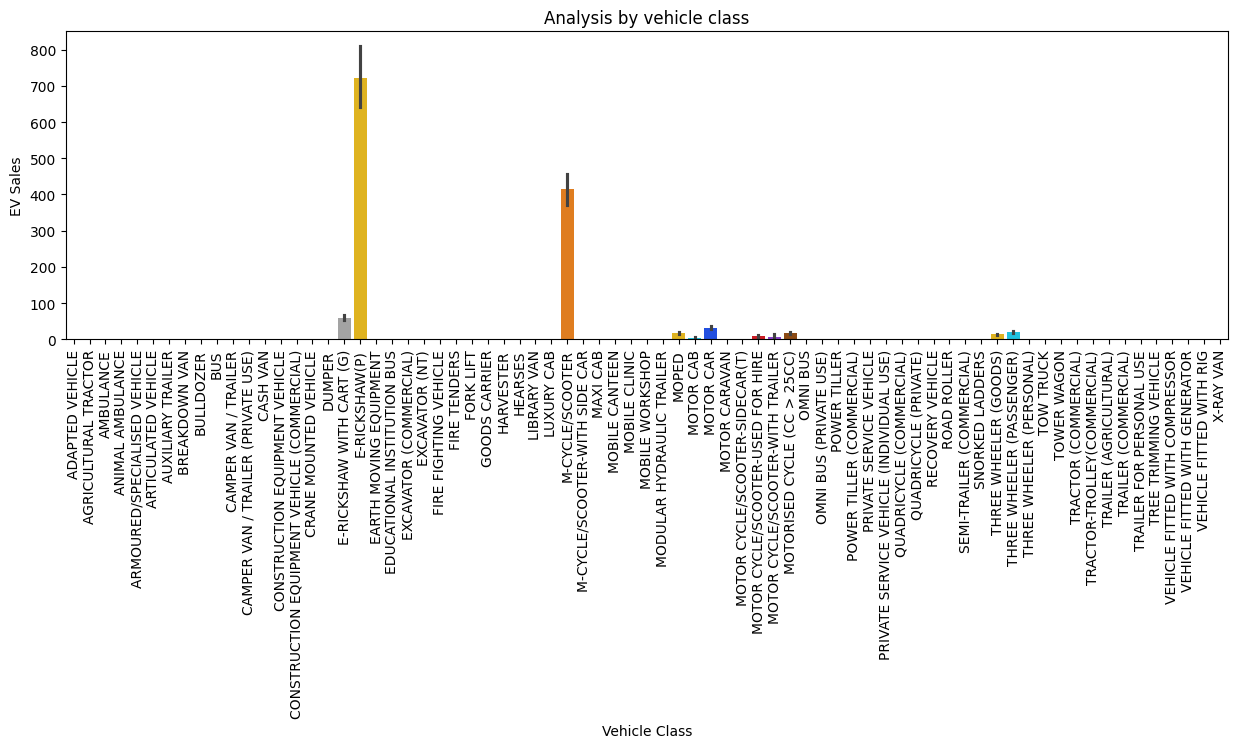

In [86]:
plt.figure(figsize=(15,4))
sns.barplot(x='Vehicle_Class',y='EV_Sales_Quantity',data=df,hue='Vehicle_Class',palette='bright')
plt.title('Analysis by vehicle class')
plt.xlabel('Vehicle Class')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);

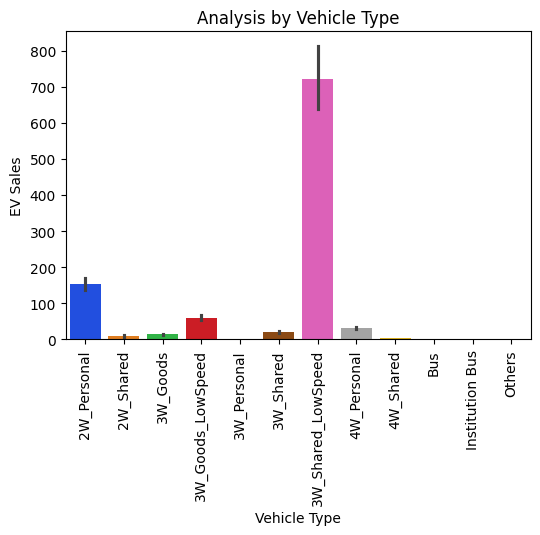

In [87]:
plt.figure(figsize=(6,4))
sns.barplot(x='Vehicle_Type',y='EV_Sales_Quantity', data=df,hue='Vehicle_Type', palette='bright')
plt.title('Analysis by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('EV Sales')
plt.xticks(rotation=90);
